In [1]:
# Team 3 - NLP Project 3
# Authors:
# Anita Mutyala
# DeviKartik Illendula
# Ramidi SriDivya Reddy

import string
import re
from nltk.tokenize import sent_tokenize, word_tokenize 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
import re
import nltk
from nltk.util import ngrams
from nltk import FreqDist
from nltk import ngrams
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# reading the file and split the data at space
file1 = open("C:/Users/anith/OneDrive/Desktop/NLP/NLP/English_dataset.txt","r")
English_data=file1.read()

def remove_whitespace(English_data): 
    return  " ".join(English_data.split()) 

In [3]:
#word tokenization
from nltk.tokenize import word_tokenize
tokens = word_tokenize(English_data)
print("# of words after word tokenizing: ", len(tokens))
print(tokens[:50])

# of words after word tokenizing:  852203
['new', 'jersey', 'is', 'sometimes', 'quiet', 'during', 'autumn', ',', 'and', 'it', 'is', 'snowy', 'in', 'april', '.', 'the', 'united', 'states', 'is', 'usually', 'chilly', 'during', 'july', ',', 'and', 'it', 'is', 'usually', 'freezing', 'in', 'november', '.', 'california', 'is', 'usually', 'quiet', 'during', 'march', ',', 'and', 'it', 'is', 'usually', 'hot', 'in', 'june', '.', 'the', 'united', 'states']


In [4]:
# removing punctuations 
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
regexp_tokens = tokenizer.tokenize(English_data.lower()) 
print("# of words after word tokenizing with removing punctuation: ", len(regexp_tokens))
print(regexp_tokens[0:50])

# of words after word tokenizing with removing punctuation:  722519
['new', 'jersey', 'is', 'sometimes', 'quiet', 'during', 'autumn', 'and', 'it', 'is', 'snowy', 'in', 'april', 'the', 'united', 'states', 'is', 'usually', 'chilly', 'during', 'july', 'and', 'it', 'is', 'usually', 'freezing', 'in', 'november', 'california', 'is', 'usually', 'quiet', 'during', 'march', 'and', 'it', 'is', 'usually', 'hot', 'in', 'june', 'the', 'united', 'states', 'is', 'sometimes', 'mild', 'during', 'june', 'and']


In [5]:
# using the wordNetLemmatizer and Porterstemmer find the stenned words
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
stemmed_words=[stemmer.stem(tok) for tok in regexp_tokens]
print("stemmed words:", stemmed_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<FreqDist with 167 samples and 722519 outcomes>
[('is', 95757), ('in', 35249), ('it', 35154), ('dure', 34966), ('the', 31295), ('but', 29717), ('and', 27913), ('sometim', 17703), ('usual', 17505), ('never', 17407), ('favorit', 13149), ('least', 12740), ('fruit', 12548), ('like', 11885), ('most', 7000), ('love', 6639), ('dislik', 5726), ('new', 5690), ('unit', 5278), ('state', 5278)]


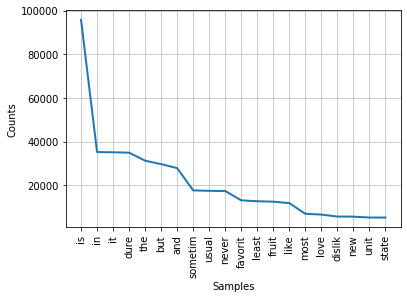

In [6]:
# finding the frequency of the words for the stemmed words
word_freq = nltk.FreqDist(stemmed_words)
print(word_freq)
k = 20
print(word_freq.most_common(k))
word_freq.plot(k)

In [7]:
# writing a function for the most common frequency words
def word_frequency(n_grams, k):
    word_freq = FreqDist(n_grams)
    print(word_freq)
    print(word_freq.most_common(k))
    return word_freq

In [8]:
def generate_ngrams(English_data, n):
    n_grams = ngrams(nltk.word_tokenize(English_data.lower()),n)
    return [' '.join(grams) for grams in n_grams]

In [9]:
n = 1
k=15
n_grams = generate_ngrams(English_data, n)
word_freq=word_frequency(n_grams, k)
print(word_freq)

<FreqDist with 200 samples and 852203 outcomes>
[('is', 95765), (',', 65547), ('.', 63763), ('in', 35249), ('it', 35154), ('during', 34966), ('the', 31295), ('but', 29717), ('and', 27913), ('sometimes', 17703), ('usually', 17505), ('never', 17407), ('favorite', 13149), ('least', 12740), ('fruit', 12548)]
<FreqDist with 200 samples and 852203 outcomes>


In [10]:
n = 2
k=15
n_gram2 = generate_ngrams(English_data, n)
word_freq1=word_frequency(n_gram2, k)
print(word_freq1)

<FreqDist with 1075 samples and 852202 outcomes>
[('it is', 35042), (', but', 29717), (', and', 26623), ('is sometimes', 17703), ('but it', 17535), ('is usually', 17505), ('and it', 17416), ('is never', 17407), ('is the', 12342), ('. the', 11381), ('least favorite', 6744), ('most loved', 6639), ('favorite fruit', 6323), ('fruit is', 6184), ('fruit ,', 6117)]
<FreqDist with 1075 samples and 852202 outcomes>


In [11]:
n = 3
k=15
n_gram3 = generate_ngrams(English_data, n)
word_freq=word_frequency(n_gram3, k)
print(word_freq)

<FreqDist with 6020 samples and 852201 outcomes>
[(', but it', 17535), ('but it is', 17535), (', and it', 17416), ('and it is', 17416), ('it is sometimes', 8862), ('it is usually', 8801), ('it is never', 8593), ('fruit is the', 6184), ('fruit , but', 6117), (', but the', 6117), ('the united states', 5278), ('united states is', 5039), ('new jersey is', 5015), ('. paris is', 5011), ('. the united', 5010)]
<FreqDist with 6020 samples and 852201 outcomes>


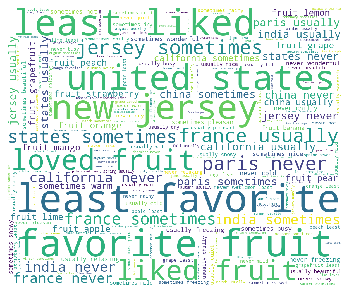

In [16]:
# wordcloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency
wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = 'white',
                            width = 1200,
                            height = 1000).generate(English_data)

plt.figure(figsize = (6, 6), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()